# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |  Emilio Navarro |
| **Fecha**      |  2-02-26 |
| **Expediente** |  757955 |

## Regresión polinomial

Observa la siguiente gráfica.

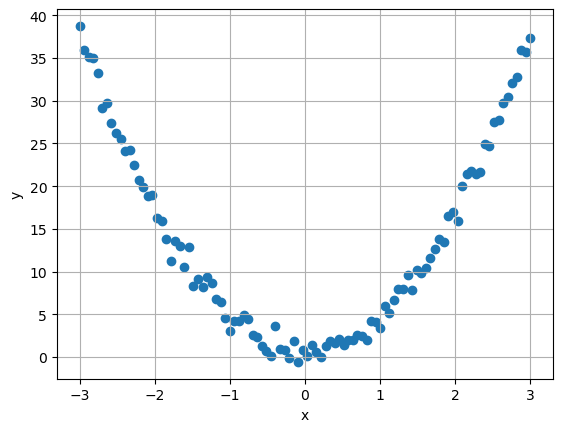

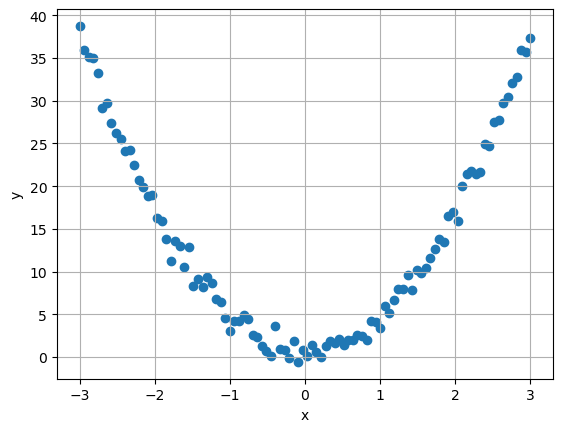

In [2]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()
plt.show()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(x.reshape(-1, 1), y)

LinearRegression()

In [5]:
beta_0 = model_linear.intercept_
beta_1 = model_linear.coef_[0]

r2 = model_linear.score(x.reshape(-1, 1), y)

print(f"beta_0 (intercepto): {beta_0:.4f}")
print(f"beta_1 (pendiente): {beta_1:.4f}")
print(f"R2: {r2:.4f}")


beta_0 (intercepto): 13.3022
beta_1 (pendiente): -0.0496
R2: 0.0001


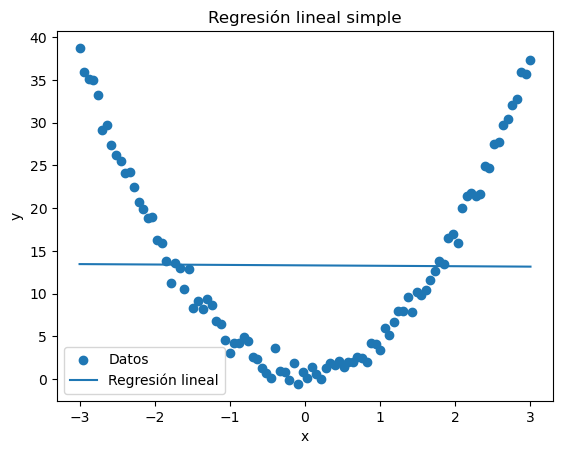

In [6]:
import matplotlib.pyplot as plt
import numpy as np

X_plot = x.reshape(-1, 1)
y_pred = model_linear.predict(X_plot)

plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred, label="Regresión lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal simple")
plt.legend()
plt.show()


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [7]:
X = x.reshape(-1, 1)

r2 = model_linear.score(X, y)
print("R2:", r2)


R2: 5.80345273922811e-05


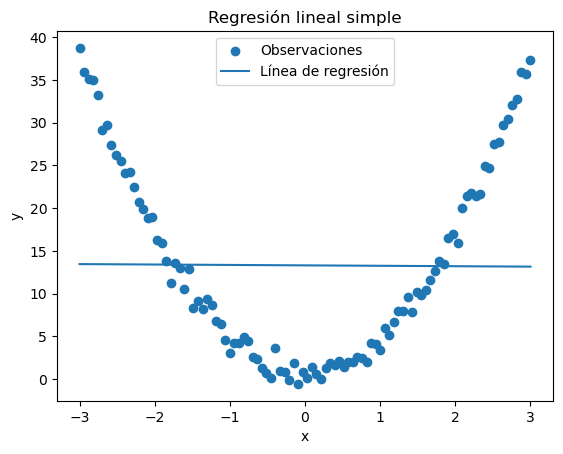

In [8]:
import matplotlib.pyplot as plt

X = x.reshape(-1, 1)
y_pred = model_linear.predict(X)

plt.figure()
plt.scatter(x, y, label="Observaciones")
plt.plot(x, y_pred, label="Línea de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal simple")
plt.legend()
plt.show()


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [10]:
import numpy as np

x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2.1, 3.9, 6.2, 8.1, 10.5], dtype=float)


In [11]:
from sklearn.linear_model import LinearRegression

X_quad = np.column_stack((x, x**2))

model_quad = LinearRegression()
model_quad.fit(X_quad, y)

r2_quad = model_quad.score(X_quad, y)

b0 = model_quad.intercept_
b1 = model_quad.coef_[0]
b2 = model_quad.coef_[1]

print(f"y = {b0:.4f} + {b1:.4f}x + {b2:.4f}x^2")
print("R2:", r2_quad)


y = 0.2600 + 1.7571x + 0.0571x^2
R2: 0.9989526223233681


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Matriz con [x, x^2]
X_quad = np.column_stack((x, x**2))

model_quad = LinearRegression()
model_quad.fit(X_quad, y)


LinearRegression()

In [14]:
import numpy as np

x_line = np.linspace(x.min(), x.max(), 300)
X_line = np.column_stack((x_line, x_line**2))
y_line = model_quad.predict(X_line)


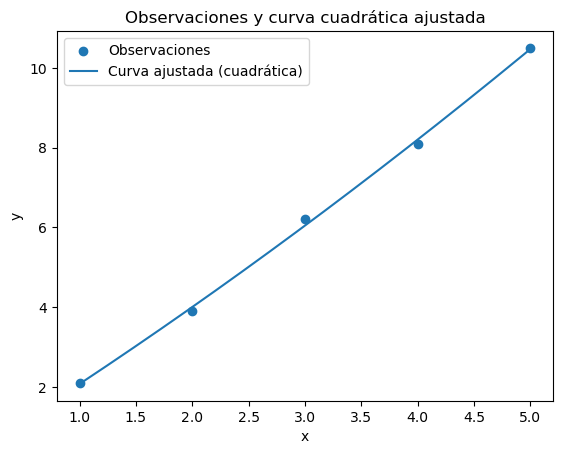

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x, y, label="Observaciones")
plt.plot(x_line, y_line, label="Curva ajustada (cuadrática)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Observaciones y curva cuadrática ajustada")
plt.legend()
plt.show()


Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression

def X_polinomial(x, grado):
    return np.column_stack([x**k for k in range(1, grado + 1)])

def ajustar_y_r2(x, y, grado):
    Xg = X_polinomial(x, grado)
    model = LinearRegression()
    model.fit(Xg, y)
    r2 = model.score(Xg, y)
    return model, r2


In [18]:
grados = [3, 5, 7, 9, 11]
modelos = {}
r2s = {}

for g in grados:
    model, r2 = ajustar_y_r2(x, y, g)
    modelos[g] = model
    r2s[g] = r2

for g in grados:
    print(f"Grado {g} -> R2 = {r2s[g]:.6f}")


Grado 3 -> R2 = 0.998953
Grado 5 -> R2 = 1.000000
Grado 7 -> R2 = 1.000000
Grado 9 -> R2 = 1.000000
Grado 11 -> R2 = 1.000000


Crea una gráfica por cada modelo con las observaciones y su curva.

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

def X_polinomial(x, grado):
    return np.column_stack([x**k for k in range(1, grado + 1)])

# Grados a usar
grados = [3, 5, 7, 9, 11]

# Ajustar modelos (por si no los tienes)
modelos = {}
r2s = {}
for g in grados:
    Xg = X_polinomial(x, g)
    m = LinearRegression()
    m.fit(Xg, y)
    modelos[g] = m
    r2s[g] = m.score(Xg, y)

# Línea suave para dibujar curvas
x_line = np.linspace(x.min(), x.max(), 400)


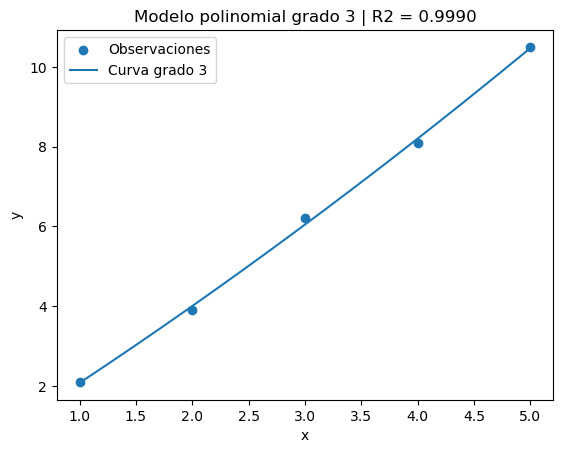

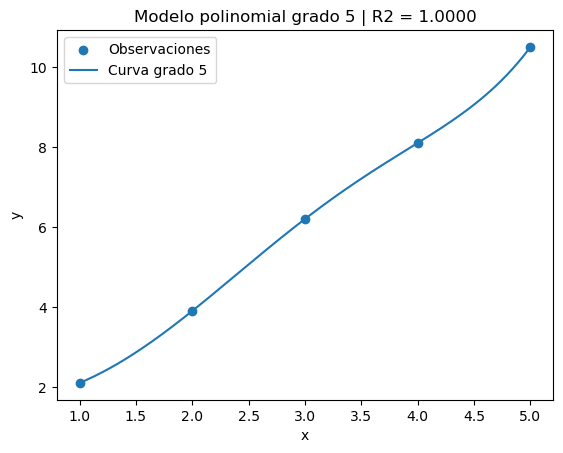

In [22]:
import matplotlib.pyplot as plt

for g in [3, 5]:
    m = modelos[g]
    y_line = m.predict(X_polinomial(x_line, g))
    
    plt.figure()
    plt.scatter(x, y, label="Observaciones")
    plt.plot(x_line, y_line, label=f"Curva grado {g}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Modelo polinomial grado {g} | R2 = {r2s[g]:.4f}")
    plt.legend()
    plt.show()


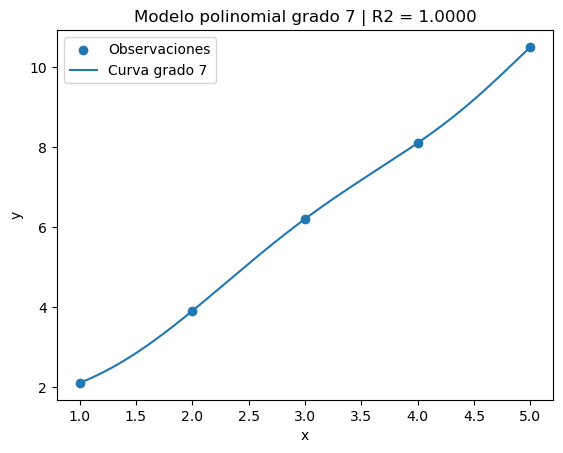

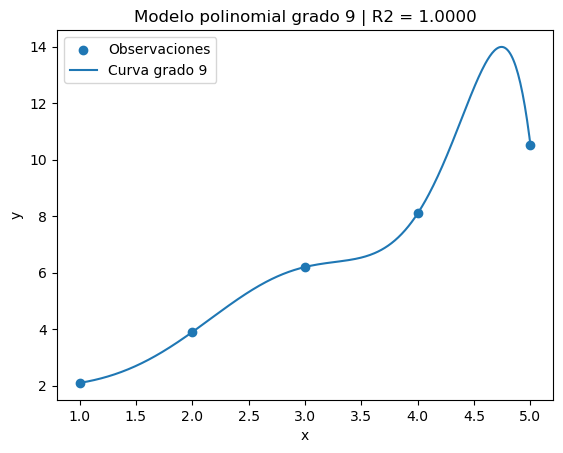

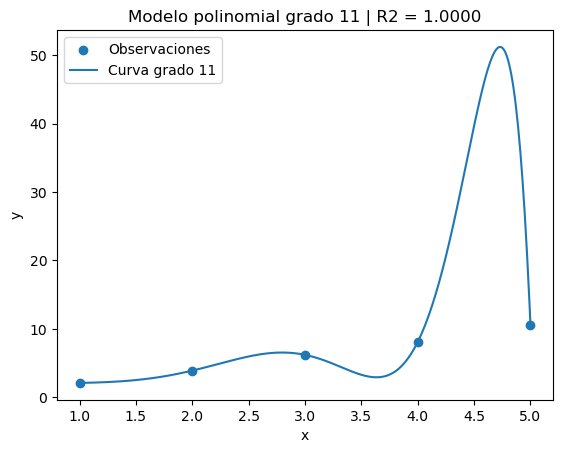

In [23]:
import matplotlib.pyplot as plt

for g in [7, 9, 11]:
    m = modelos[g]
    y_line = m.predict(X_polinomial(x_line, g))
    
    plt.figure()
    plt.scatter(x, y, label="Observaciones")
    plt.plot(x_line, y_line, label=f"Curva grado {g}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Modelo polinomial grado {g} | R2 = {r2s[g]:.4f}")
    plt.legend()
    plt.show()


**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [24]:
import pandas as pd

tabla_r2 = pd.DataFrame({"grado": list(r2s.keys()), "R2": list(r2s.values())}).sort_values("grado")
display(tabla_r2)

mejor_por_r2 = max(r2s, key=r2s.get)
print("Mejor por R2:", mejor_por_r2, "con R2 =", r2s[mejor_por_r2])


,grado,R2
0,3,0.998953
1,5,1.000000
2,7,1.000000
3,9,1.000000
4,11,1.000000


Mejor por R2: 5 con R2 = 1.0


In [25]:
tol = 0.01  # tolerancia: qué tan cerca del mejor R2 quieres estar

R2_max = max(r2s.values())

candidatos = [g for g in sorted(r2s) if (R2_max - r2s[g]) <= tol]
mejor_balance = min(candidatos)

print("R2 máximo:", R2_max)
print("Candidatos (dentro de", tol, "del máximo):", candidatos)
print("Mejor balance (menor grado dentro del máximo):", mejor_balance, "con R2 =", r2s[mejor_balance])


R2 máximo: 1.0
Candidatos (dentro de 0.01 del máximo): [3, 5, 7, 9, 11]
Mejor balance (menor grado dentro del máximo): 3 con R2 = 0.9989526223233681


Considero que el modelo de grado 3 es el mejor balance entre simplicidad y ajuste. Aunque el modelo de grado 5 tiene el R² más alto, el modelo de grado 3 logra un R² muy similar con menor complejidad. prefiero el modelo más simple que explica casi lo mismo.


Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

def X_polinomial(x, grado):
    return np.column_stack([x**k for k in range(1, grado + 1)])

grados = [2, 3, 5, 7, 9, 11]

modelos = {}
for g in grados:
    Xg = X_polinomial(x, g)
    m = LinearRegression()
    m.fit(Xg, y)
    modelos[g] = m


In [33]:
x0 = 5

predicciones = {}
for g in grados:
    X0 = X_polinomial(np.array([x0]), g)   
    y_hat = modelos[g].predict(X0)[0]
    predicciones[g] = y_hat

predicciones


{2: np.float64(10.474285714285715),
 3: np.float64(10.474285714285479),
 5: np.float64(10.499999999999872),
 7: np.float64(10.499999999998838),
 9: np.float64(10.500000000001283),
 11: np.float64(10.499999999994689)}

In [35]:
import pandas as pd

tabla_pred = pd.DataFrame({
    "grado": list(predicciones.keys()),
    "y_hat_en_x=5": list(predicciones.values())
}).sort_values("grado")

tabla_pred


,grado,y_hat_en_x=5
0,2,10.474286
1,3,10.474286
2,5,10.500000
3,7,10.500000
4,9,10.500000
5,11,10.500000


¿Cuál modelo crees que sea mejor?

In [38]:
import pandas as pd

tabla = pd.DataFrame({
    "grado": grados,
    "R2": [r2s.get(g, None) for g in grados],
    "y_hat_en_5": [predicciones[g] for g in grados]
}).sort_values("grado")

tabla


,grado,R2,y_hat_en_5
0,2,NaN,10.474286
1,3,0.998953,10.474286
2,5,1.000000,10.500000
3,7,1.000000,10.500000
4,9,1.000000,10.500000
5,11,1.000000,10.500000


In [40]:
import numpy as np

tol = 0.01  # qué tan cerca del mejor R2 aceptas

R2_max = max(r2s.values())

# rango típico de y (para detectar extrapolaciones locas)
y_min, y_max = float(np.min(y)), float(np.max(y))
margen = (y_max - y_min) * 0.5  # tolerancia extra
lim_inf = y_min - margen
lim_sup = y_max + margen

candidatos = []
for g in sorted(grados):
    if g not in r2s or g not in predicciones:
        continue
    cerca_R2 = (R2_max - r2s[g]) <= tol
    pred_ok = (lim_inf <= predicciones[g] <= lim_sup)
    if cerca_R2 and pred_ok:
        candidatos.append(g)

if len(candidatos) == 0:
    mejor = max(r2s, key=r2s.get)  # si ninguno pasa, elegir el mayor R2
else:
    mejor = min(candidatos)        # menor grado (más simple) que cumple

print("R2 máximo:", R2_max)
print("Rango y observado:", (y_min, y_max))
print("Límites razonables para y_hat(x=5):", (lim_inf, lim_sup))
print("Candidatos:", candidatos)
print("Modelo elegido:", mejor)


R2 máximo: 1.0
Rango y observado: (2.1, 10.5)
Límites razonables para y_hat(x=5): (-2.1, 14.7)
Candidatos: [3, 5, 7, 9, 11]
Modelo elegido: 3


El modelo de grado 3 es el mejor balance entre simplicidad y capacidad de ajuste. Aunque los modelos de grados mayores (5, 7, 9, 11) tienen un $R^2$ igual a 1 y predicen valores similares en $x=5$, el modelo de grado 3 logra el mismo desempeño con menor complejidad, reduce el riesgo de sobreajuste y facilita la interpretación. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3